# **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
import numpy as np # linear algebra
import cv2 # opencv library
import PIL
import PIL.Image as Image # python imaging library
import os # to use operating system dependent functionality

import matplotlib.pylab as plt # to create some visualizations

import tensorflow as tf # tensorflow library
import tensorflow_hub as hub    # to use pre-trained models from tensorflow hub
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow import keras # to use tensorflow's high-level API for deep learning
from tensorflow.keras import layers     # to use layers from tensorflow.keras
from tensorflow.keras.models import Sequential # to use sequential model from tensorflow.keras
from tensorflow.keras.optimizers import Adam


# **LOAD FLOWERS DATASET**

In [2]:
import pathlib # to use object-oriented filesystem paths
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # url to download the dataset
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, untar=True) # download the dataset and store it in the data_dir
data_dir = pathlib.Path(data_dir) # convert the data_dir to a pathlib object

228813984/228813984 [==============================] - 8s 0us/step


# **VISUALIZING**

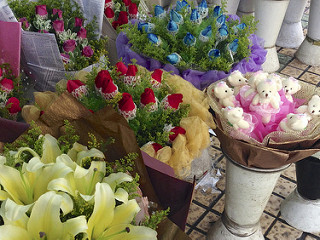

In [3]:
roses = list(data_dir.glob('roses/*')) # to display the images of roses in the dataset
PIL.Image.open(str(roses[65])) # to display the 65th image of roses in the dataset

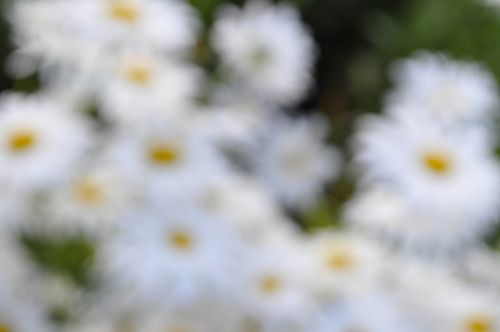

In [4]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[65]))

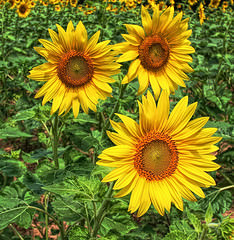

In [5]:
sunflower = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflower[65]))

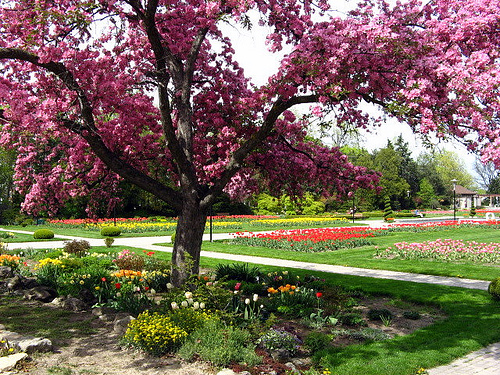

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[65]))

# **SPLITTING THE DATASET**

In [7]:
img_height,img_width=224,224 # to set the height and width of the images
batch_size=32 # to set the batch size
train_ds = tf.keras.preprocessing.image_dataset_from_directory( # to create a dataset from the images in the directory
  data_dir,     # the directory where the images are stored
  validation_split=0.2,  # to specify the validation split
  subset="training", # to specify the subset of the dataset
  seed=123,     # to set the seed for the random number generator
  image_size=(img_height, img_width), # to set the size of the images
  batch_size=batch_size, # to set the batch size
  label_mode='categorical' # to specify the label mode
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory( # to create a validation dataset
  data_dir, # the path of the dataset
  validation_split=0.2, # the percentage of the dataset to use for validation
  subset="validation", # to specify that this is the validation dataset
  seed=123, # to set the seed for random number generation
  image_size=(img_height, img_width), # the size of the images in the dataset
  batch_size=batch_size, # the batch size
  label_mode='categorical' # to specify that the labels are categorical
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# **TRAINING THE MODEL**

In [32]:
model = Sequential() # to create a sequential model

pretrained_model= tf.keras.applications.ResNet50(include_top=False, # to use the ResNet50 model
                   input_shape=(224,224,3), # to set the input shape of the images
                   pooling='avg',classes=5, # to set the pooling and the number of classes
                   weights='imagenet') # to use the pre-trained weights from the ImageNet dataset
for layer in pretrained_model.layers: # to set the layers of the pre-trained model to be non-trainable
        layer.trainable=False # to set the layers to be non-trainable
model.add(pretrained_model) # to add the pre-trained model to the sequential model
model.add(Flatten()) # to add a flatten layer to the model
model.add(Dense(512, activation='relu')) # to add a dense layer to the model and activate it using the relu function
model.add(Dense(5, activation='softmax')) # to add a dense layer to the model and activate it using the softmax function

In [33]:
model.summary() # to display the summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_6 (ModuleWr  (None, 2048)              0         
 apper)                                                          
                                                                 
 module_wrapper_7 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_8 (ModuleWr  (None, 5)                 2565      
 apper)                                                          
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
________

In [34]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) # to compile the model with the optimizer, loss function and metrics

In [35]:
history = model.fit( # to train the model on the training dataset and validate it on the validation dataset for 10 epochs
  train_ds, # training dataset
  validation_data=val_ds, # validation dataset
  epochs=10 # number of epochs
) # to train the model on the training dataset and validate it on the validation dataset for 10 epochs

Epoch 1/10
92/92 [==============================] - 19s 171ms/step - loss: 0.5622 - accuracy: 0.8168 - val_loss: 0.3634 - val_accuracy: 0.8760
Epoch 2/10
92/92 [==============================] - 12s 130ms/step - loss: 0.2581 - accuracy: 0.9060 - val_loss: 0.3003 - val_accuracy: 0.8978
Epoch 3/10
92/92 [==============================] - 12s 127ms/step - loss: 0.1337 - accuracy: 0.9550 - val_loss: 0.3840 - val_accuracy: 0.8706
Epoch 4/10
92/92 [==============================] - 12s 125ms/step - loss: 0.0748 - accuracy: 0.9779 - val_loss: 0.3763 - val_accuracy: 0.8815
Epoch 5/10
92/92 [==============================] - 12s 125ms/step - loss: 0.0430 - accuracy: 0.9894 - val_loss: 0.3854 - val_accuracy: 0.8951
Epoch 6/10
92/92 [==============================] - 12s 126ms/step - loss: 0.0241 - accuracy: 0.9952 - val_loss: 0.3558 - val_accuracy: 0.9101
Epoch 7/10
92/92 [==============================] - 12s 126ms/step - loss: 0.0103 - accuracy: 0.9986 - val_loss: 0.3644 - val_accuracy: 0.9114

# **EVALUATING THE MODEL**

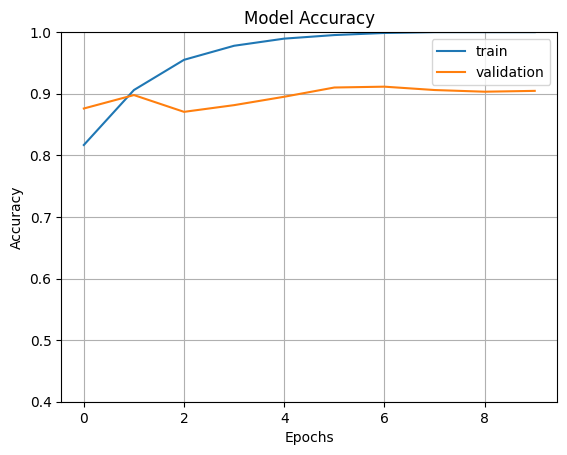

In [36]:
fig1 = plt.gcf() # to create a new figure
plt.plot(history.history['accuracy']) # to plot the accuracy of the model
plt.plot(history.history['val_accuracy']) # to plot the validation accuracy of the model
plt.axis(ymin=0.4,ymax=1) # to set the limits of the y-axis
plt.grid() # to display the grid
plt.title('Model Accuracy') # to set the title of the plot
plt.ylabel('Accuracy') # to set the label of the y-axis
plt.xlabel('Epochs') # to set the label of the x-axis
plt.legend(['train', 'validation']) # to display the legend
plt.show() # to display the plot

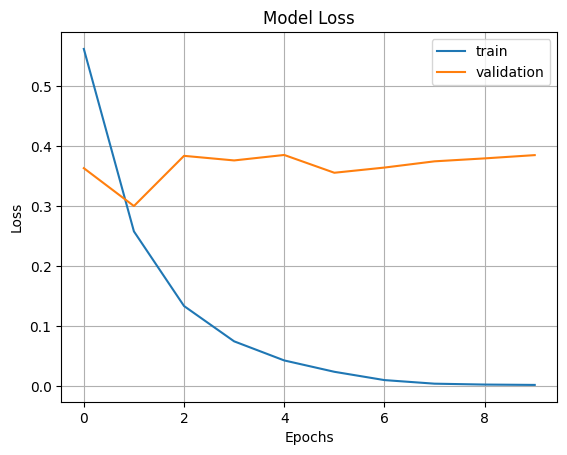

In [37]:
plt.plot(history.history['loss']) # to plot the loss of the model
plt.plot(history.history['val_loss']) # to plot the validation loss of the model
plt.grid() # to display the grid
plt.title('Model Loss') # to display the title of the plot
plt.ylabel('Loss') # to display the label of the y-axis
plt.xlabel('Epochs') # to display the label of the x-axis
plt.legend(['train', 'validation']) # to display the legend
plt.show()   # to display the plot

# **MAKING PREDICTIONS**

In [45]:
import cv2  # opencv library
image=cv2.imread('/content/download1.jpg') # to read the image
image_resized= cv2.resize(image,(img_height,img_width)) # to resize the image
image=np.expand_dims(image_resized,axis=0) # to expand the dimensions of the image
print(image.shape) # to display the shape of the image


(1, 224, 224, 3)


In [43]:
pred=model.predict(image) # to predict the class of the image
print(pred) # to display the class of the image

1/1 [==============================] - 0s 22ms/step
[[9.9999940e-01 4.4248426e-07 1.8029690e-08 5.3266827e-08 1.4653366e-08]]


In [44]:
output_class=class_names[np.argmax(pred)] # to display the predicted class of the image
print("The predicted class is", output_class) # to display the predicted class of the image

The predicted class is daisy
